This is an implementation of a simple neural net on toy data using only numpy for linear algebra. There is one hidden layer of neurons and thus two layers of synapses. It uses backpropogation to train the synapse weights. Thanks to Siraj Raval who showed this simple implementation on [YouTube](https://www.youtube.com/watch?v=h3l4qz76JhQ).

In [1]:
import numpy as np

In [3]:
#sigmoid function
def nonlim(x, deriv=False):
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [4]:
#sample input data
X = np.array([[0,0,1],
             [0,1,1],
             [1,0,1],
             [1,1,1]])

#sample output data
y = np.array([[0],
              [1],
              [1],
              [0]])

In [14]:
#create synapses
def create_synapses(len_X_t, len_y_t, num_synapses=4, rand_seed=1):
    np.random.seed(rand_seed)
    syn0 = 2*np.random.random((len_X_t, num_synapses))- 1
    syn1 = 2*np.random.random((num_synapses, len_y_t))- 1
    return syn0, syn1

In [11]:
def predict_y(X, syn0, syn1, return_l1=False):
    layer_0 = X
    layer_1 = nonlim(np.dot(layer_0, syn0))
    layer_2 = nonlim(np.dot(layer_1, syn1))
    if return_l1==False:
        return layer_2
    return layer_2, layer_1

In [21]:
def gen_neural_net(X, y, num_synapses=4, rand_seed=1, num_steps=60000, freq_error_report=10000):
    #generate initial synapse weights
    len_X_t = len(X.T)
    len_y_t = len(y.T)
    syn0, syn1 = create_synapses(len_X_t, len_y_t, num_synapses=num_synapses, rand_seed=rand_seed)
    #train synapses and record error weights
    errors = []
    for step in range(num_steps):
        #make a prediction based on the current synapse weights and generate errors
        l2, l1 = predict_y(X, syn0, syn1, return_l1=True)
        l2_error = y - l2
        errors.append(np.mean(np.abs(l2_error)))
        if(step%freq_error_report) == 0:
            print('Error:', errors[step])
        #backpropogate
        l2_delta = l2_error*nonlim(l2, deriv=True)
        l1_error = l2_delta.dot(syn1.T)
        l1_delta = l1_error*nonlim(l1, deriv=True)
        #set new synapse weights
        syn1 += l1.T.dot(l2_delta)
        syn0 += X.T.dot(l1_delta)
    return errors, syn0, syn1

In [22]:
errors, syn0, syn1 = gen_neural_net(X, y)

Error: 0.49641003190272537
Error: 0.008584525653247153
Error: 0.005789459862507809
Error: 0.004629176776769984
Error: 0.003958765280273649
Error: 0.003510122567861676


In [23]:
print(predict_y(X, syn0, syn1))

[[0.0026057 ]
 [0.99672212]
 [0.99701713]
 [0.00386756]]


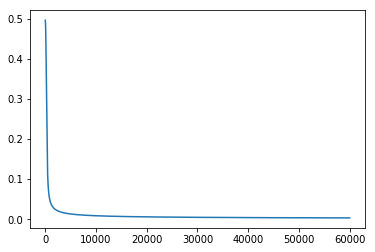

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(errors)